In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [7]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [8]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

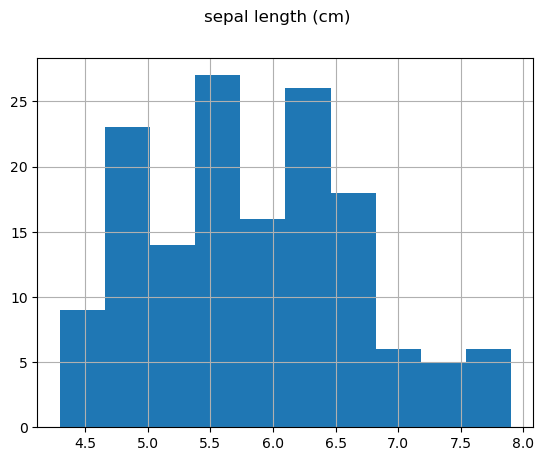

In [10]:
# distribution of features
col="sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

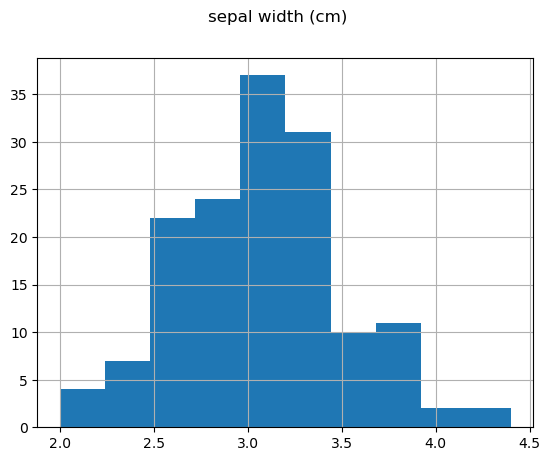

In [11]:
# distribution of features
col="sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

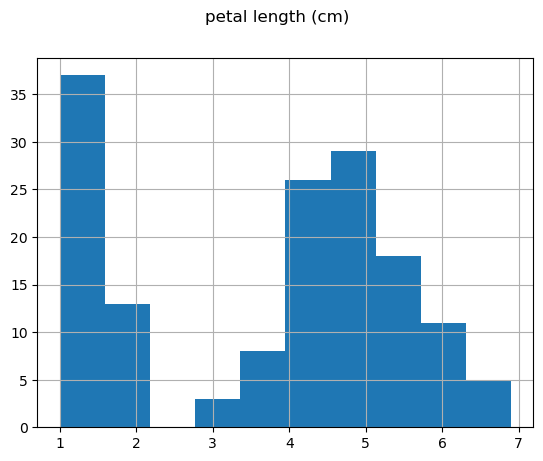

In [12]:
# distribution of features
col="petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

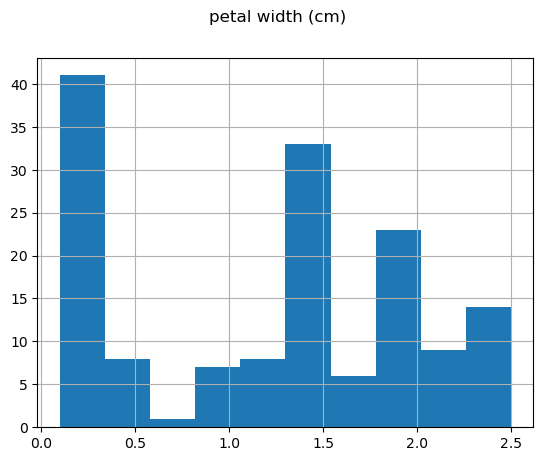

In [13]:
# distribution of features
col="petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

In [14]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df["target_names"]=df["target"].map({0:"setosa",1:"versicolor",2:"virginica"})

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


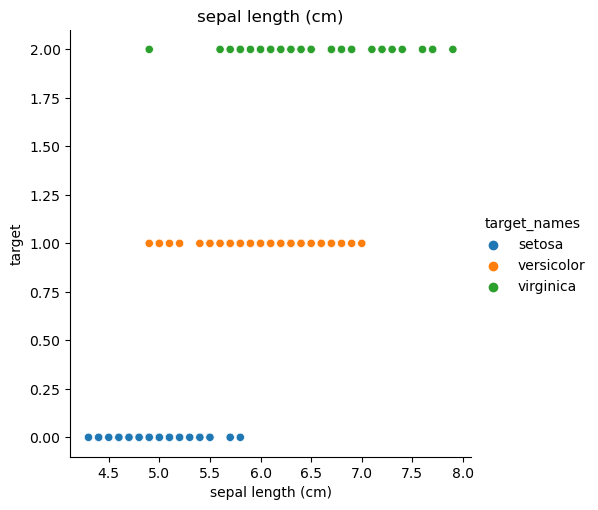

In [17]:
col ="sepal length (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.title(col)
plt.show()

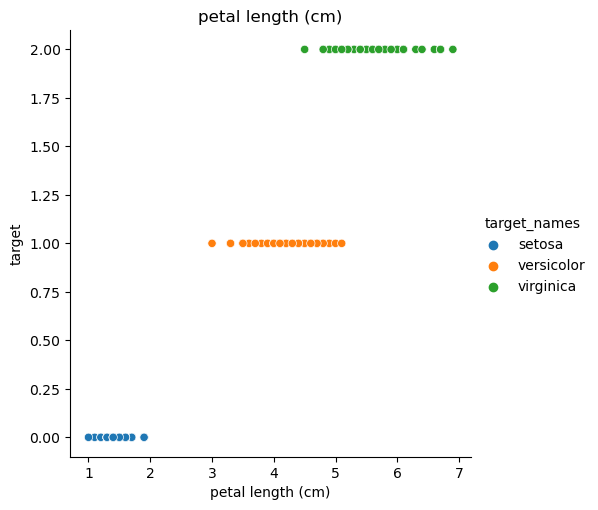

In [18]:
col ="petal length (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.title(col)
plt.show()

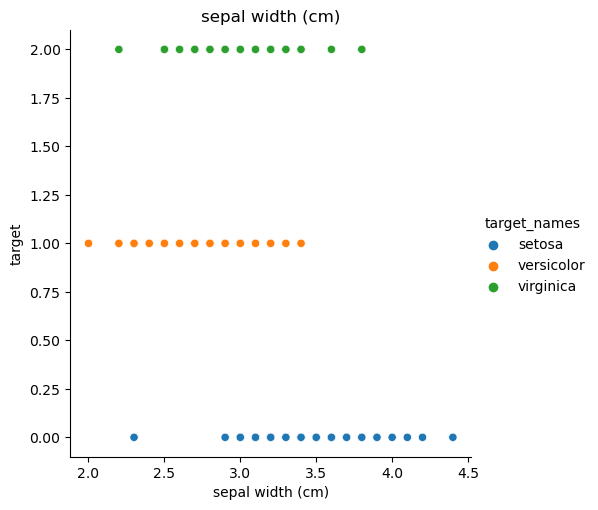

In [19]:
col ="sepal width (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.title(col)
plt.show()

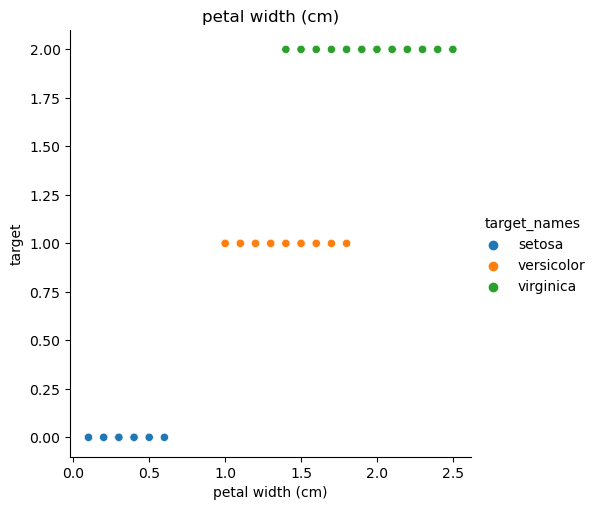

In [20]:
col ="petal width (cm)"
sns.relplot(x=col,y="target",hue="target_names",data=df)
plt.title(col)
plt.show()

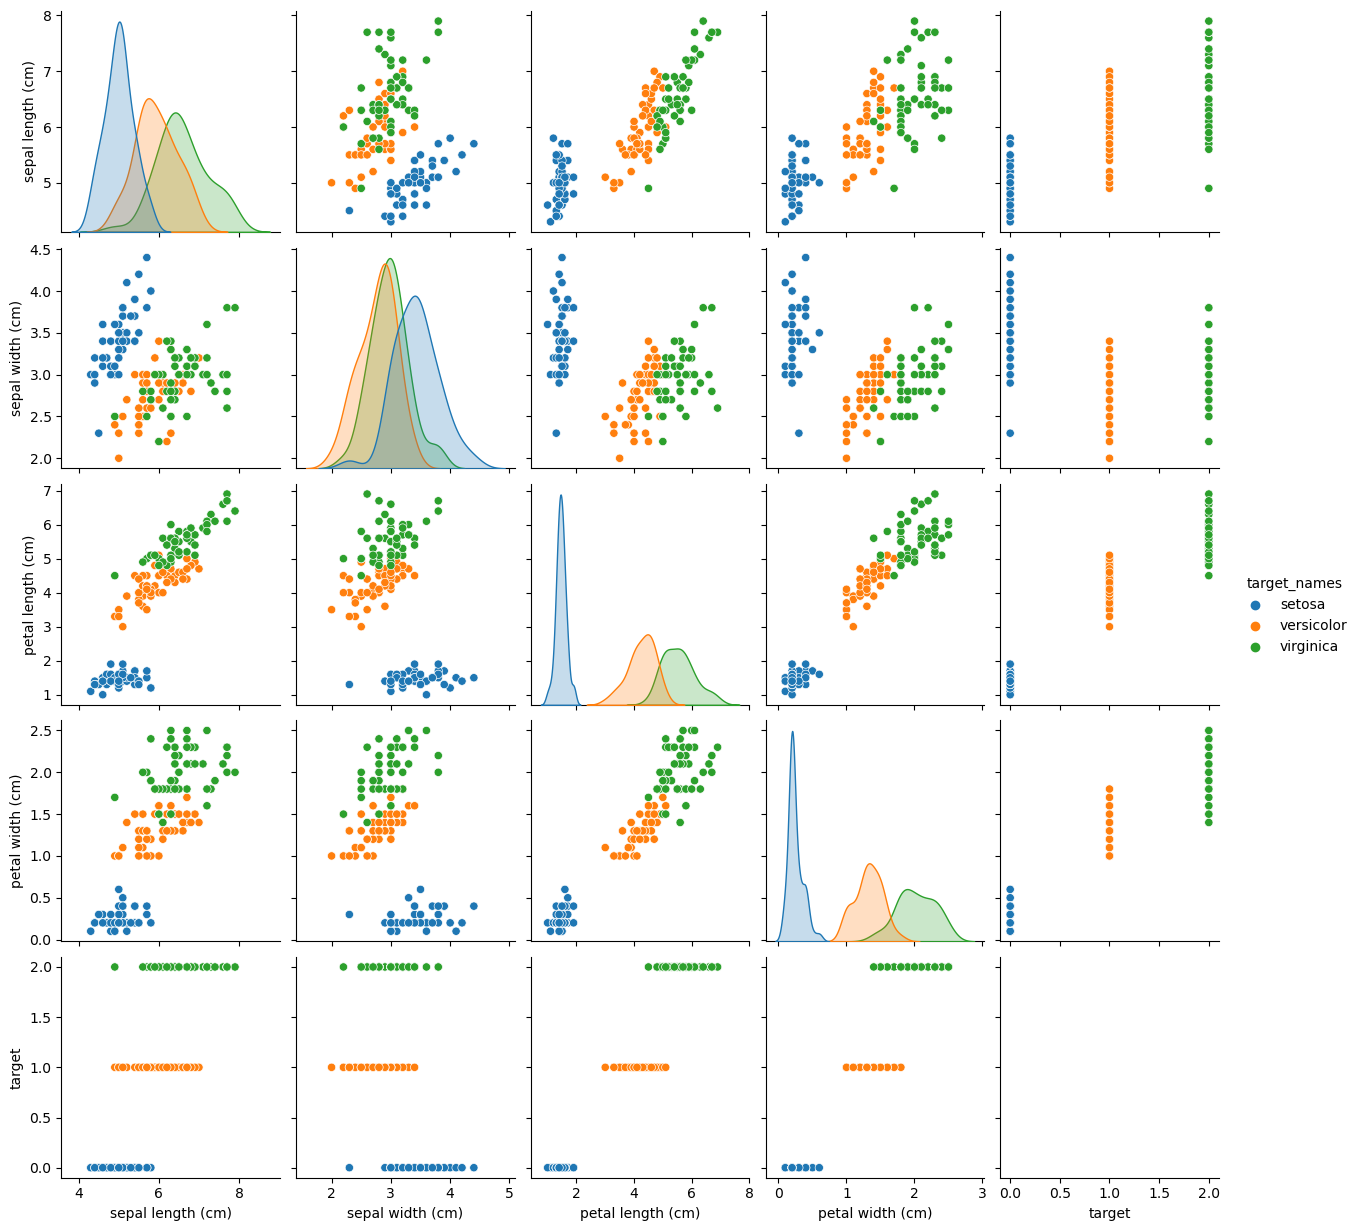

In [21]:
sns.pairplot(df,hue="target_names")

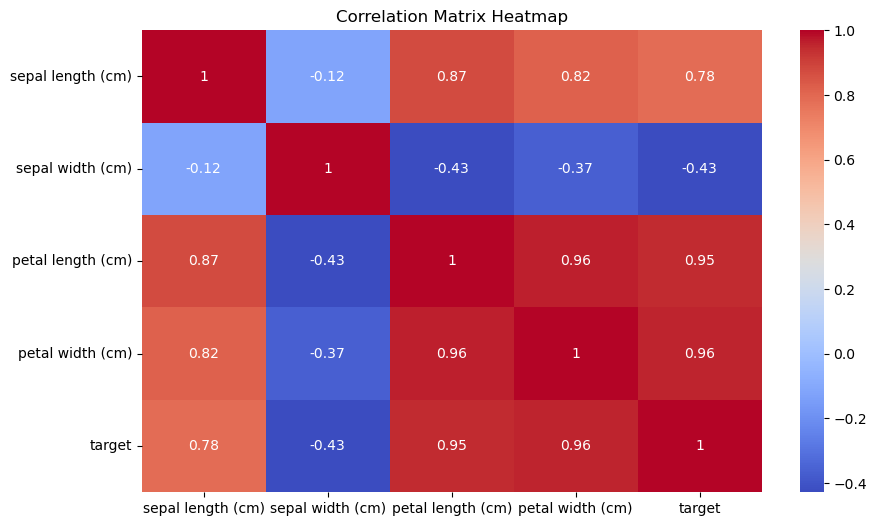

In [22]:
#heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [23]:
# train the data
X = df.drop(['target','target_names'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Train a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Make predictions with Random Forest
y_pred_rf = clf_rf.predict(X_test)

In [27]:
# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)


In [34]:
print("Random Forest Classifier:")
print()
print(f"Accuracy: {accuracy_rf}")
print()
print(f"Confusion Matrix:\n{confusion_rf}")
print()
print(f"Classification Report:\n{report_rf}")


Random Forest Classifier:

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# Classification with Logistic Regression

# Train a Logistic Regression Classifier
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [30]:
# Make predictions with Logistic Regression
y_pred_lr = clf_lr.predict(X_test)


In [31]:
# Evaluate the Logistic Regression classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)


In [35]:
print("\nLogistic Regression Classifier:")
print()
print(f"Accuracy: {accuracy_lr}")
print()
print(f"Confusion Matrix:\n{confusion_lr}")
print()
print(f"Classification Report:\n{report_lr}")


Logistic Regression Classifier:

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
# Compare classifiers
if accuracy_rf > accuracy_lr:
    print("Random Forest Classifier performs better.")
elif accuracy_lr > accuracy_rf:
    print("Logistic Regression Classifier performs better.")
else:
    print("Both classifiers have the same accuracy.")

Both classifiers have the same accuracy.
